
# Customer Churn Prediction



## Import Libraries


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3833,9169-BSVIN,Male,0,No,No,12,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),74.75,827.05,No
5699,6719-OXYBR,Male,0,No,No,15,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,85.30,1219.85,No
2909,9619-GSATL,Female,0,No,No,43,Yes,No,DSL,No,...,No,Yes,No,No,One year,No,Electronic check,55.45,2444.25,No
2723,1866-ZSLJM,Male,0,No,No,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.50,402.85,No
699,8338-QIUNR,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),66.50,4811.6,No



##  Data Exploration


In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


* Quick observation: Data Type of **MonthlyCharges** is *float64*, while **TotalCharges** is *object*. We will need to convert the TotalCharges into numeric form


In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
#pd.to_numeric(df.TotalCharges)

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] #Identify non-numeric TotalCharges records

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No



We found ***11*** records with TotalCharges that are not numeric. 11 out of 7,000+ (~0.1%) is not significant. In this practice, we can remove them from the population.


In [9]:
df1 = df[df.TotalCharges!=' '] #Removed non-numeric records
df1.shape

(7032, 20)

Now **TotalCharges** is ready for being converted into numeric form

In [10]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/45/zbnvmzd104lgjrrs9jgs3hg00000gn/T/ipykernel_50948/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.dtypes

dtype('float64')


## Quick Visualization


Customers who are **not churned**, what is the **tenure** distribution?

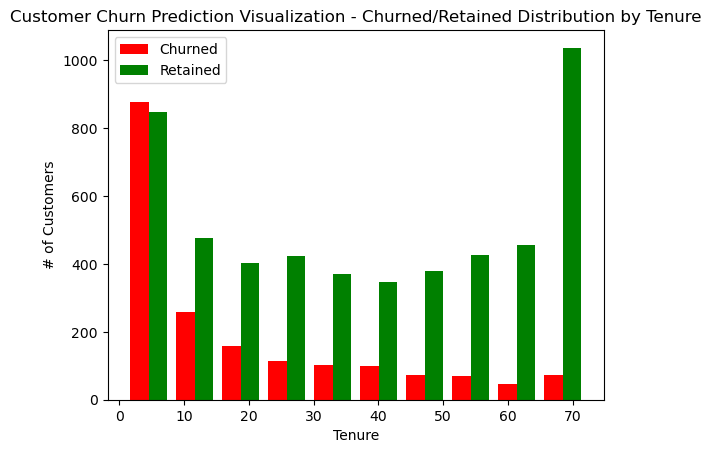

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("# of Customers")
plt.title("Customer Churn Prediction Visualization - Churned/Retained Distribution by Tenure")

plt.hist([tenure_churn_yes,tenure_churn_no], color=['red','green'], label=['Churned','Retained'])
plt.legend()

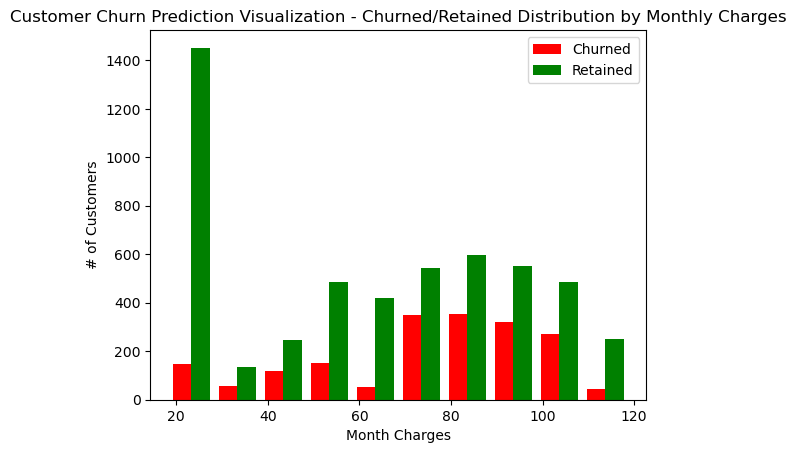

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Month Charges")
plt.ylabel("# of Customers")
plt.title("Customer Churn Prediction Visualization - Churned/Retained Distribution by Monthly Charges")

plt.hist([mc_churn_yes,mc_churn_no], color=['red','green'], label=['Churned','Retained'])
plt.legend()

## 

In [15]:
for column in df:
    print(f'{column} : {df[column].unique()}') #List unique values in each column

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [16]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object': #the column's datatype is 'object' only
            print(f'{column} : {df[column].unique()}')

In [17]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True) #Take No Internet Service as No
df1.replace('No phone service','No',inplace=True) #Take No Phone Service as No

/var/folders/45/zbnvmzd104lgjrrs9jgs3hg00000gn/T/ipykernel_50948/2411107681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True) #Take No Internet Service as No
/var/folders/45/zbnvmzd104lgjrrs9jgs3hg00000gn/T/ipykernel_50948/2411107681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True) #Take No Phone Service as No


In [19]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup'
                  ,'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

/var/folders/45/zbnvmzd104lgjrrs9jgs3hg00000gn/T/ipykernel_50948/48730843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0}, inplace=True)


In [21]:
for column in df1:
    print(f'{column} : {df1[column].unique()}') 

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [22]:
df1['gender'].replace({'Female': 1,'Male': 0}, inplace=True)

/var/folders/45/zbnvmzd104lgjrrs9jgs3hg00000gn/T/ipykernel_50948/696371678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1,'Male': 0}, inplace=True)


In [23]:
df1['gender'].unique()

array([1, 0])


### One Hot Encoding


In [24]:
pd.get_dummies(data=df1,columns=['InternetService']) #get_dummies function in pd is a "One Hot Encoding" method, which transposes colums with multiple values into colums for ML purposes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [25]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3809,0,0,0,0,50,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7018,0,0,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4314,0,1,0,0,24,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
32,1,0,1,1,27,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             


### Scale None 0/1 Columns


In [28]:
cols_to_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) #fit_transform scales the column being specified above

In [29]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6435,0,0,1,1,0.718310,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
522,0,0,1,1,0.760563,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3497,1,1,1,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
for column in df2:
    print(f'{column} : {df2[column].unique()}') 

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

**Data explorations/manipulations done!**


## Train & Split


In [31]:
x = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
x_train.shape #training population

(5625, 26)

In [34]:
x_test.shape #testing population

(1407, 26)

In [35]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0



### Training Model


In [48]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'), #1st layer of neural network; input_shape is the number of columns
    keras.layers.Dense(15, activation='relu'), #2nd layer (hidden) of neural network (optional)
    keras.layers.Dense(1, activation='sigmoid'), #final layer of neural network -> final result of 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5206 - accuracy: 0.7216
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7874
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.7934
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 968us/step - loss: 0.4128 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 0s 968us/step - loss: 0.4106 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 937us/step - loss: 0.4089 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 0s 956us/step - loss: 0.4079 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4060 

176/176 [==============================] - 0s 972us/step - loss: 0.3624 - accuracy: 0.8311
Epoch 81/100
176/176 [==============================] - 0s 985us/step - loss: 0.3627 - accuracy: 0.8315
Epoch 82/100
176/176 [==============================] - 0s 976us/step - loss: 0.3624 - accuracy: 0.8313
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8322
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8316
Epoch 85/100
176/176 [==============================] - 0s 926us/step - loss: 0.3605 - accuracy: 0.8308
Epoch 86/100
176/176 [==============================] - 0s 960us/step - loss: 0.3594 - accuracy: 0.8341
Epoch 87/100
176/176 [==============================] - 0s 971us/step - loss: 0.3604 - accuracy: 0.8316
Epoch 88/100
176/176 [==============================] - 0s 977us/step - loss: 0.3598 - accuracy: 0.8332
Epoch 89/100
176/176 [==============================] - 0s 962us/step - loss: 0.3

In [49]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 857us/step - loss: 0.4714 - accuracy: 0.7825


[0.47141414880752563, 0.7825160026550293]

In [50]:
yp = model.predict(x_test) #yp -> y-prediction
yp[:5]

44/44 [==============================] - 0s 786us/step


array([[0.34735525],
       [0.35810333],
       [0.00121806],
       [0.9070692 ],
       [0.58521724]], dtype=float32)


#### Conversion -> to 0/1


In [51]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [52]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [53]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64


## Confusion Matrix / Classification Report


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.53      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407




#### Confusion Matrix


Text(95.72222222222221, 0.5, 'Truth')

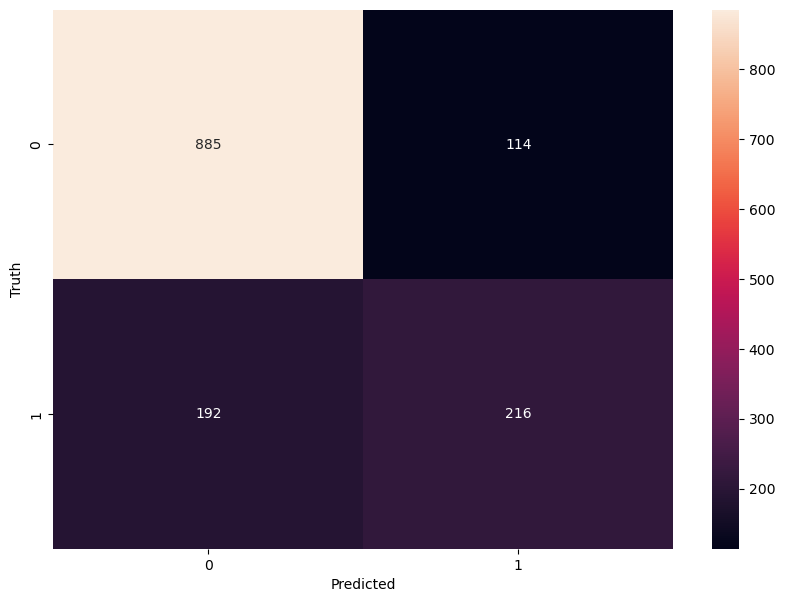

In [55]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
y_test.shape

(1407,)


#### Accuracy


In [70]:
accuracy = (885+216)/(885+216+114+192)
print(round(accuracy,2))

0.78



#### Precision for 0 class, i.e. precision for customers who did not churn


In [71]:
prec_0 = 885/(885+192)
print(round(prec_0,2))

0.82



#### Precision for 1 class, i.e. precision for customers who actually churned


In [72]:
prec_1 = 216/(216+114)
print(round(prec_1,2))

0.65



#### Recall for 0 class


In [73]:
recall_0 = 885/(885+114)
print(round(recall_0,2))

0.89



#### Recall for 1 class


In [74]:
recall_1 = 216/(216+192)
print(round(recall_1,2))

0.53



## Precision: think about *predictions* as base
## Recall: think about *truth* as base



### F-1 Score


$$
F_1 = 2 * \frac{precision * recall}{precision + recall}
$$

In [75]:
f1_0 = 2*(prec_0 * recall_0)/(prec_0 + recall_0)
print(round(f1_0,2))

0.85


In [76]:
f1_1 = 2*(prec_1 * recall_1)/(prec_1 + recall_1)
print(round(f1_1,2))

0.59
